# This notebook plots the filter visualization results from varying threshold for activation-based alignment (Supplementary Fig. 15)

In [1]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results_path = os.path.join('../../results', 'task1')
save_path = os.path.join(results_path, 'conv_filters_threshold_sweep')
file_path = os.path.join(results_path, 'threshold_sweep_filter_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)

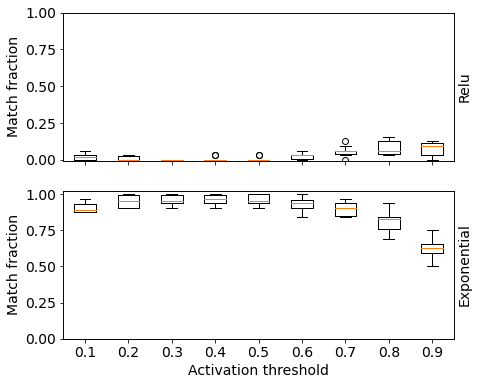

In [3]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

activations = ['relu', 'exponential']
activation_names = ['Relu', 'Exponential']

fig = plt.figure(figsize=(7,6))
ax = plt.subplot(2,1,1)
vals = []
for thresh in thresholds:
    vals.append(results['relu'][thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('Relu', fontsize=14)

ax = plt.subplot(2,1,2)
vals = []
for thresh in thresholds:
    vals.append(results['exponential'][thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.xticks(range(1,len(thresholds)+1), thresholds, fontsize=14);
plt.xlabel('Activation threshold', fontsize=14)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('Exponential', fontsize=14)

outfile = os.path.join(results_path, 'threshold_sweep_results.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

